In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_iris
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns= feature_names)
Y_data = load_iris().target

X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.feature_selection import f_classif
f_value = f_classif(X_data, Y_data)
for feature in zip(feature_names, f_value[0]):
  print(feature)

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


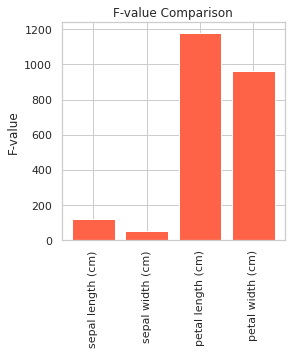

In [8]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

In [9]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_data)
for feature in zip(feature_names, selector.variances_):
  print(feature)

('sepal length (cm)', 0.6811222222222222)
('sepal width (cm)', 0.1887128888888887)
('petal length (cm)', 3.0955026666666674)
('petal width (cm)', 0.5771328888888888)


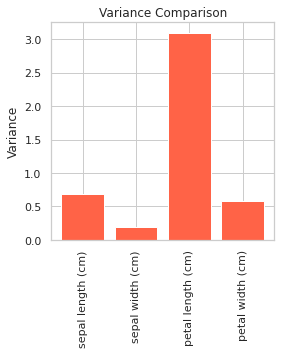

In [10]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

In [11]:
selector = VarianceThreshold(threshold = 0.2)
X_data_new = selector.fit_transform(X_data)
print(f"Number of features before variance thresholding: {X_data.shape[1]}")
print(f"Number of features after variance thresholding: {X_data_new.shape[1]}")

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


In [12]:
from sklearn.feature_selection import mutual_info_classif

MI_score = mutual_info_classif(X_data, Y_data, random_state=0)
for feature in zip(feature_names, MI_score):
  print(feature)

('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


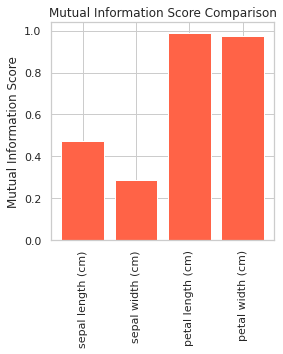

In [13]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

In [14]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(score_func = f_classif, k=2)
X_data_new = skb.fit_transform(X_data, Y_data)

print(f"Number of features before selection: {X_data.shape[1]}")
print(f"Number of features after selection: {X_data_new.shape[1]}")

Number of features before selection: 4
Number of features after selection: 2


In [15]:
for feature_list_index in skb.get_support(indices=True):
  print('- '+feature_names[feature_list_index])

- petal length (cm)
- petal width (cm)


In [16]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
efs = EFS(estimator=lr,
          min_features=1,
          max_features=4,
          scoring="accuracy",
          cv=5)

efs.fit(X_data, Y_data)

print(f"\nBest accuracy: {efs.best_score_:.2f}")
print(f'Best subset (indices): {efs.best_idx_}')
print(f'Best subset (corresponding names): {efs.best_feature_names_}')

Features: 15/15


Best accuracy: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [21]:
X_data_new = efs.transform(X_data)

print(f"Number of features before transformation: {X_data.shape[1]}")
print(f"Number of features after transformation: {X_data_new.shape[1]}")

Number of features before transformation: 4
Number of features after transformation: 4


In [23]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by="avg_score", ascending= True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


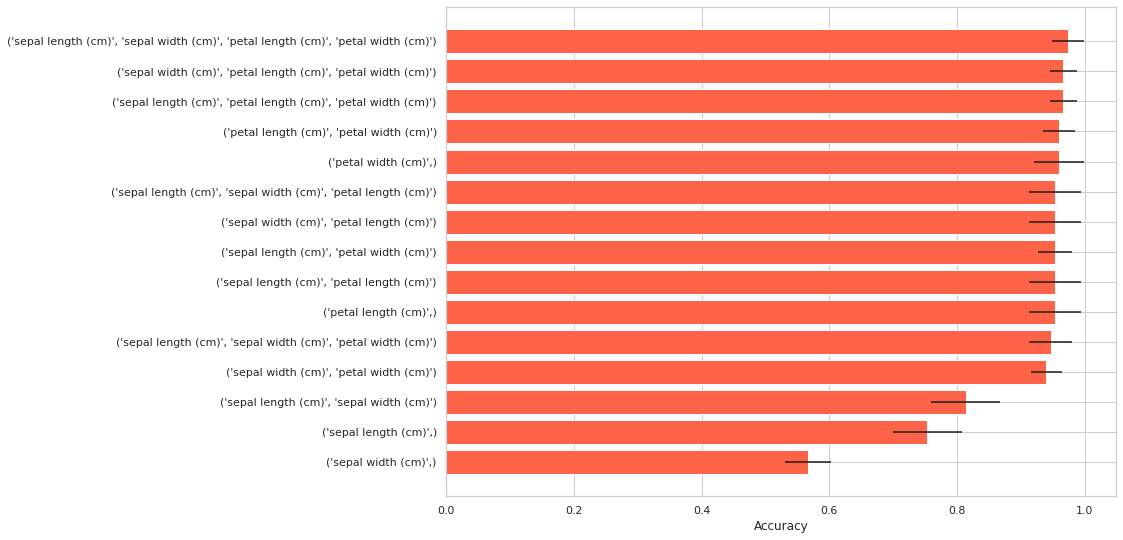

In [25]:
fig,ax = plt.subplots(figsize=(12,9))
Y_pos = np.arange(len(efs_results))
ax.barh(Y_pos,
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato')
ax.set_yticks(Y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [29]:
lr = LogisticRegression()
sfs = SFS(estimator=lr,
          k_features=(1,4),
          forward=True,
          scoring="accuracy",
          cv=5)

sfs.fit(X_data, Y_data)

print(f"\nBest accuracy: {sfs.k_score_:.2f}")
print(f'Best subset (indices): {sfs.k_feature_idx_}')
print(f'Best subset (corresponding names): {sfs.k_feature_names_}')


Best accuracy: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [30]:
X_data_new = sfs.transform(X_data)

print(f"Number of features before transformation: {X_data.shape[1]}")
print(f"Number of features after transformation: {X_data_new.shape[1]}")

Number of features before transformation: 4
Number of features after transformation: 4


In [31]:
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."


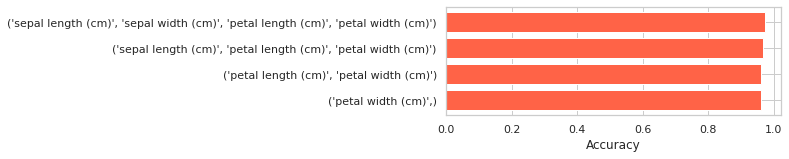

In [32]:
fig,ax = plt.subplots(figsize=(6,2))
Y_pos = np.arange(len(sfs_results))
ax.barh(Y_pos,
        sfs_results['avg_score'],
        color='tomato')
ax.set_yticks(Y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [56]:
lr = LogisticRegression()
sbs = SFS(estimator=lr,
          k_features=(1,4),
          forward=False,
          scoring="accuracy",
          cv=5)

sbs = sbs.fit(X_data.values, Y_data) #Customowe nazwy wywalają błąd

print(f"\nBest accuracy: {sbs.k_score_:.2f}")
print(f'Best subset (indices): {sbs.k_feature_idx_}')
print(f'Best subset (corresponding names): {sbs.k_feature_names_}')


Best accuracy: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('0', '1', '2', '3')


In [44]:
X_data_new = sbs.transform(X_data)

print(f"Number of features before transformation: {X_data.shape[1]}")
print(f"Number of features after transformation: {X_data_new.shape[1]}")

Number of features before transformation: 4
Number of features after transformation: 4


In [45]:
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

,feature_idx,cv_scores,avg_score,feature_names
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(0, 1, 2, 3)"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(0, 2, 3)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(2, 3)"
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(3,)"


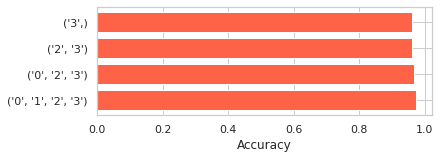

In [57]:
fig,ax = plt.subplots(figsize=(6,2))
Y_pos = np.arange(len(sbs_results))
ax.barh(Y_pos,
        sbs_results['avg_score'],
        color='tomato')
ax.set_yticks(Y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [58]:
print(f'Best subset: {efs.best_feature_names_}')
print(f'Best subset: {sfs.k_feature_names_}')
print(f'Best subset: {sbs.k_feature_names_}')

Best subset: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset: ('0', '1', '2', '3')


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=0)

In [62]:
rfc = RandomForestClassifier(random_state=0, criterion="gini")
rfc.fit(X_train, Y_train)

for feature in zip(feature_names, rfc.feature_importances_):
  print(feature)

('sepal length (cm)', 0.102443508848457)
('sepal width (cm)', 0.023647097298179886)
('petal length (cm)', 0.479778346415163)
('petal width (cm)', 0.39413104743820015)


In [63]:
from sklearn.feature_selection import SelectFromModel

In [65]:
rfc = RandomForestClassifier(random_state=0, criterion="gini")

sfm = SelectFromModel(estimator=rfc,
                      threshold = 0.2)

sfm = sfm.fit(X_train, Y_train)

print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
  print("- "+feature_names[feature_list_index])

The most important features based on random forest classifier:
- petal length (cm)
- petal width (cm)


In [67]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

print(f'Number of features before tranformation: {X_train.shape[1]}')
print(f'Number of features after tranformation: {X_important_train.shape[1]}')

Number of features before tranformation: 4
Number of features after tranformation: 2


In [70]:
from sklearn.metrics import accuracy_score
rfc_full = RandomForestClassifier(random_state=0,
                                  criterion="gini")
rfc_full.fit(X_train,Y_train)
pred_full = rfc_full.predict(X_test)

print(f'The Accuracy of classifier with full features: {accuracy_score(Y_test,pred_full):.2f}')

The Accuracy of classifier with full features: 0.98


In [71]:
rfc_lim = RandomForestClassifier(random_state=0,
                                  criterion="gini")
rfc_lim.fit(X_important_train,Y_train)
pred_lim = rfc_lim.predict(X_important_test)

print(f'The Accuracy of classifier with full features: {accuracy_score(Y_test,pred_lim):.2f}')

The Accuracy of classifier with full features: 0.98
